In [232]:
import pandas as pd
from io import StringIO
import re
import os
import ast
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

base = "D://hidden_cve/"

import json
with open(f'D:/hidden_cve/rawdata/repo_commits.json', 'r') as fin:
    repo_commits = json.load(fin)

In [138]:
filename = os.listdir(base+'graphql')[1634]

In [178]:
df = pd.read_csv(base+"graphql/"+filename)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
dfs = [pd.read_csv(f'D:/repo_data5/{year}.csv') for year in range(2015,2022)]

vuln_lst = []
for repo,dates in repo_commits.items():
    for date in dates:
        vuln_lst.append(("VulnEvent",repo,date[1]))
dfs.append(pd.DataFrame(vuln_lst,columns = dfs[0].columns))

df = pd.concat(dfs)
repos =df.name.unique()
repo_dfs = []
for repo in repos:
    day_df = pd.DataFrame()
    for col in df.type.unique():
        cur_type = df[(df.type == col) & (df.name == repo)]
        if cur_type.empty:
            continue
        cur_df = pd.to_datetime(cur_type.created_at)
        cur_df = pd.DataFrame(cur_df).set_index('created_at')
        cur_df[col]=1
        cur_df = cur_df.resample("D").sum()
        day_df = day_df.join(cur_df,how='outer')
        day_df = day_df.fillna(0)
    repo_dfs.append(day_df)
    print(day_df)
    break

In [ ]:
repo_dfs[0]

In [ ]:
repo_dfs[0].plot()

In [352]:
cur_type = df[(df.type == col) & (df.name == repo)]
cur_df = pd.to_datetime(cur_type.created_at)
cur_df = pd.DataFrame(cur_df).set_index('created_at')
cur_df[col]=1
cur_df = cur_df.resample("D").sum()
day_df = day_df.join(cur_df,how='outer')
day_df = day_df.fillna(0)

TypeError: Cannot join tz-naive with tz-aware DatetimeIndex

In [309]:
events = ['CommitCommentEvent', 'CreateEvent', 'DeleteEvent', 'ForkEvent',  'IssueCommentEvent',  'IssuesEvent',
         'PullRequestEvent', 'PullRequestReviewCommentEvent', 'PushEvent', 'WatchEvent']
event_dict = dict()
for a in events:
    event_dict[a] = []
both =  list(repo_commits.keys())[1794]
owner,repo = both.split("/") # .index('rust-lang/rust')
both,owner,repo
with open(f'D:/repo_data4/{owner}_{repo}.json','r') as mfile:
    for line in mfile.readlines():
        # print(line)
        line = ast.literal_eval(line)
        cur_json = json.loads(line.decode('utf-8'))
        event_dict[cur_json['type']].append(cur_json['created_at'])
        
events_df=pd.DataFrame.from_dict(event_dict,orient='index').transpose()
day_df = pd.DataFrame()
for col in events:
    if  not df[col].isnull().all():
        cur_df = pd.to_datetime(df[col].dropna())
        cur_df = pd.DataFrame(cur_df).set_index(col)
        cur_df[col]=1
        cur_df = cur_df.resample("D").sum()
        day_df = day_df.join(cur_df,how='outer')
        day_df = day_df.fillna(0)
day_df

,CommitCommentEvent,CreateEvent,DeleteEvent,ForkEvent,IssueCommentEvent,IssuesEvent,PullRequestEvent,PullRequestReviewCommentEvent,PushEvent,WatchEvent


In [313]:
events_df=pd.DataFrame.from_dict(event_dict,orient='index').transpose()
day_df = pd.DataFrame()
for col in events:
    if  not df[col].isnull().all():
        cur_df = pd.to_datetime(df[col].dropna())
        cur_df = pd.DataFrame(cur_df).set_index(col)
        cur_df[col]=1
        cur_df = cur_df.resample("D").sum()
        day_df = day_df.join(cur_df,how='outer')
        day_df = day_df.fillna(0)
day_df

,CommitCommentEvent,CreateEvent,DeleteEvent,ForkEvent,IssueCommentEvent,IssuesEvent,PullRequestEvent,PullRequestReviewCommentEvent,PushEvent,WatchEvent
2017-05-03 00:00:00+00:00,0.0,0.0,0.0,1.0,111,18,19,9,9,5
2017-05-04 00:00:00+00:00,0.0,0.0,0.0,6.0,385,72,28,28,14,21
2017-05-05 00:00:00+00:00,0.0,0.0,0.0,3.0,220,14,24,23,17,20
2017-05-06 00:00:00+00:00,0.0,0.0,1.0,1.0,182,37,22,13,11,19
2017-05-07 00:00:00+00:00,0.0,0.0,0.0,1.0,178,39,14,37,18,10
...,...,...,...,...,...,...,...,...,...,...
2018-05-07 00:00:00+00:00,0.0,1.0,1.0,6.0,314,24,21,31,23,15
2018-05-08 00:00:00+00:00,0.0,1.0,0.0,2.0,251,17,25,33,23,22
2018-05-09 00:00:00+00:00,0.0,0.0,0.0,3.0,335,27,30,37,20,22
2018-05-10 00:00:00+00:00,0.0,1.0,0.0,8.0,369,28,33,41,21,20


In [255]:
commits = df[["additions","deletions","commit_date"]]
commits['commit_date']=pd.to_datetime(df['commit_date'])
day_df = commits.resample("D",on="commit_date").sum()

for col in ['vulnerabilityAlerts', 'forks', 'issues', 'pullRequests', 'releases', 'stargazers']:
    if  not df[col].isnull().all():
        cur_df = pd.to_datetime(df[col].dropna())
        cur_df = pd.DataFrame(cur_df).set_index(col)
        cur_df[col]=1
        cur_df = cur_df.resample("D").sum()
        day_df = day_df.join(cur_df,how='outer')
        day_df = day_df.fillna(0)

In [256]:
repo = filename.split(".csv")[0]
for key in repo_commits.keys():
    if repo == key.split("/")[1]:
        cve_dates = [res[1] for res in repo_commits[key]]


cur_df = pd.to_datetime(cve_dates)
cur_df = pd.DataFrame(cur_df,columns=["cve"]).set_index("cve")
cur_df['cve']=1
cur_df = cur_df.resample("D").sum()
day_df = day_df.join(cur_df)
day_df = day_df.fillna(0)


Object `plot` not found.


In [260]:
day_df.to_csv(base+'final/'+filename)

In [ ]:
day_df['cve'].plot

In [261]:
day_df

,additions,deletions,forks,issues,pullRequests,releases,stargazers,cve
commit_date,,,,,,,,
2010-06-16 00:00:00+00:00,886,0,0.0,0.0,0.0,0.0,823,0.0
2010-06-17 00:00:00+00:00,0,0,0.0,0.0,0.0,0.0,1,0.0
2010-06-18 00:00:00+00:00,0,0,0.0,0.0,0.0,0.0,2,0.0
2010-06-19 00:00:00+00:00,0,0,0.0,0.0,0.0,0.0,1,0.0
2010-06-20 00:00:00+00:00,0,0,0.0,0.0,0.0,0.0,2,0.0
...,...,...,...,...,...,...,...,...
2022-02-02 00:00:00+00:00,2874,1263,3.0,14.0,26.0,0.0,35,0.0
2022-02-03 00:00:00+00:00,1511,759,4.0,11.0,20.0,0.0,35,0.0
2022-02-04 00:00:00+00:00,1294,660,4.0,7.0,22.0,0.0,38,0.0


<AxesSubplot:xlabel='date'>

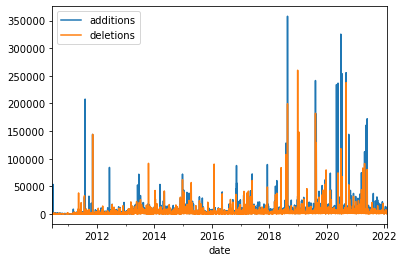

In [53]:
commits.resample("D",on='date').sum().plot()

In [82]:
vulns = pd.DataFrame([a[1] for a in found[1]],columns=['vuln'])

In [90]:
vulns['found']=1

In [88]:
vulns["vuln"] =  pd.to_datetime(vulns["vuln"]).dt.floor('H')

commits

In [92]:
new_commits = commits.resample("D",on='date').sum()

In [101]:
pd.merge(new_commits,vulns, left_on='date')

MergeError: Must pass "right_on" OR "right_index".

In [97]:
vulns['date']=vulns['vuln']

<AxesSubplot:xlabel='date'>

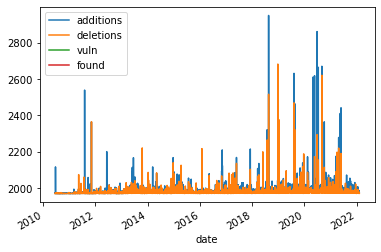

In [106]:
new_commits.join(vulns,how='outer').plot()

In [104]:
vulns= vulns.set_index('date')

In [116]:
merged = new_commits.join(vulns,how='outer')

In [124]:
merged.vuln


date
2010-06-16 00:00:00+00:00   NaT
2010-06-17 00:00:00+00:00   NaT
2010-06-18 00:00:00+00:00   NaT
2010-06-19 00:00:00+00:00   NaT
2010-06-20 00:00:00+00:00   NaT
                             ..
2022-02-02 00:00:00+00:00   NaT
2022-02-03 00:00:00+00:00   NaT
2022-02-04 00:00:00+00:00   NaT
2022-02-05 00:00:00+00:00   NaT
2022-02-06 00:00:00+00:00   NaT
Name: vuln, Length: 4270, dtype: datetime64[ns, UTC]

In [125]:
merged.vuln.loc[~merged.vuln.isnull()] = 1  # not nan
merged.vuln.loc[merged.vuln.isnull()] = 0   # nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
